In [7]:
import pandas as pd 
import numpy as np

df = pd.read_csv('data/wtbdata_245days-2.csv')
df['hour'] = pd.to_datetime(df['Tmstamp']).dt.hour
df['minute'] = pd.to_datetime(df['Tmstamp']).dt.minute
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / 60)
df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / 60)

# Wind directions
df['Wdir_sin'] = np.sin(np.radians(df['Wdir']))
df['Wdir_cos'] = np.cos(np.radians(df['Wdir']))
df['Ndir_sin'] = np.sin(np.radians(df['Ndir']))
df['Ndir_cos'] = np.cos(np.radians(df['Ndir']))


df['Patv_lag1'] = df.groupby('TurbID')['Patv'].shift(1)
df['Patv_lag6'] = df.groupby('TurbID')['Patv'].shift(6)  # 1 hour ago
df['Patv_lag144'] = df.groupby('TurbID')['Patv'].shift(144)  # 24 hours ago

df.head()


/var/folders/gr/mhlc8kfs39b7v4v54d1fd4bc0000gn/T/ipykernel_17296/3667103241.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/var/folders/gr/mhlc8kfs39b7v4v54d1fd4bc0000gn/T/ipykernel_17296/3667103241.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


TurbID  Day Tmstamp  Wspd  Wdir   Etmp   Itmp   Ndir  Pab1  Pab2  ...  \
0       1    1   00:00   NaN   NaN    NaN    NaN    NaN   NaN   NaN  ...   
1       1    1   00:10  6.17 -3.99  30.73  41.80  25.92   1.0   1.0  ...   
2       1    1   00:20  6.27 -2.18  30.60  41.63  20.91   1.0   1.0  ...   
3       1    1   00:30  6.42 -0.73  30.52  41.52  20.91   1.0   1.0  ...   
4       1    1   00:40  6.25  0.89  30.49  41.38  20.91   1.0   1.0  ...   

   hour_cos    minute_sin  minute_cos  Wdir_sin  Wdir_cos  Ndir_sin  Ndir_cos  \
0       1.0  0.000000e+00         1.0       NaN       NaN       NaN       NaN   
1       1.0  8.660254e-01         0.5 -0.069582  0.997576  0.437116  0.899405   
2       1.0  8.660254e-01        -0.5 -0.038039  0.999276  0.356901  0.934142   
3       1.0  5.665539e-16        -1.0 -0.012741  0.999919  0.356901  0.934142   
4       1.0 -8.660254e-01        -0.5  0.015533  0.999879  0.356901  0.934142   

   Patv_lag1  Patv_lag6  Patv_lag144  
0        NaN        NaN          NaN  
1        NaN        NaN          NaN  
2     494.66        NaN          NaN  
3     509.76        NaN          NaN  
4     542.53        NaN          NaN  

[5 rows x 26 columns]

In [8]:
import numpy as np
# hanling irrelgualries in data

print(f"missing values before getting rid of irregularties: {df.isnull().sum().sum()}")

mask_abnormal = (
    (df['Patv'] < 0) | # negative power
    ((df['Wspd'] < 1) & (df['Patv'] > 10)) | # too muhc power for low wind
    ((df['Wspd'] < 2) & (df['Patv'] > 100)) | # too much power for low wind
    ((df['Wspd'] < 3) & (df['Patv'] > 200)) | # too much power for low wind
    ((df['Wspd'] > 2.5) & (df['Patv'] == 0)) | # no power for reasonable wind
    ((df['Wspd'] == 0) & (df['Wdir'] == 0) & (df['Etmp'] == 0)) | # sensor error
    (df['Etmp'] < -21) | # external temp outside of reasonable range
    (df['Itmp'] < -21) | # internal temp outside of reasonable range
    (df['Etmp'] > 60) | # external temp outside of reasonable range
    (df['Itmp'] > 70) | # internal temp outside of reasonable range
    (df['Wdir'] > 180) | (df['Wdir'] < -180) | # wind direction out of range
    (df['Ndir'] > 720) | (df['Ndir'] < -720) | # nacelle direction out of range
    (df['Pab1'] > 89) | (df['Pab2'] > 89) | (df['Pab3'] > 89) # pitch angle out of range
)

columns_to_nan = df.columns.difference(['TurbID', 'Day'])
df.loc[mask_abnormal, columns_to_nan] = np.nan

print(f"missing values after getting rid of irregularties: {df.isnull().sum().sum()}")

missing values before getting rid of irregularties: 862024
missing values after getting rid of irregularties: 38203524


In [9]:
# drop rows with any NaN values and reset index
df_cleaned = df.dropna().reset_index(drop=True)
print(f"shape after cleaning: {df_cleaned.shape}")


shape after cleaning: (3072427, 26)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

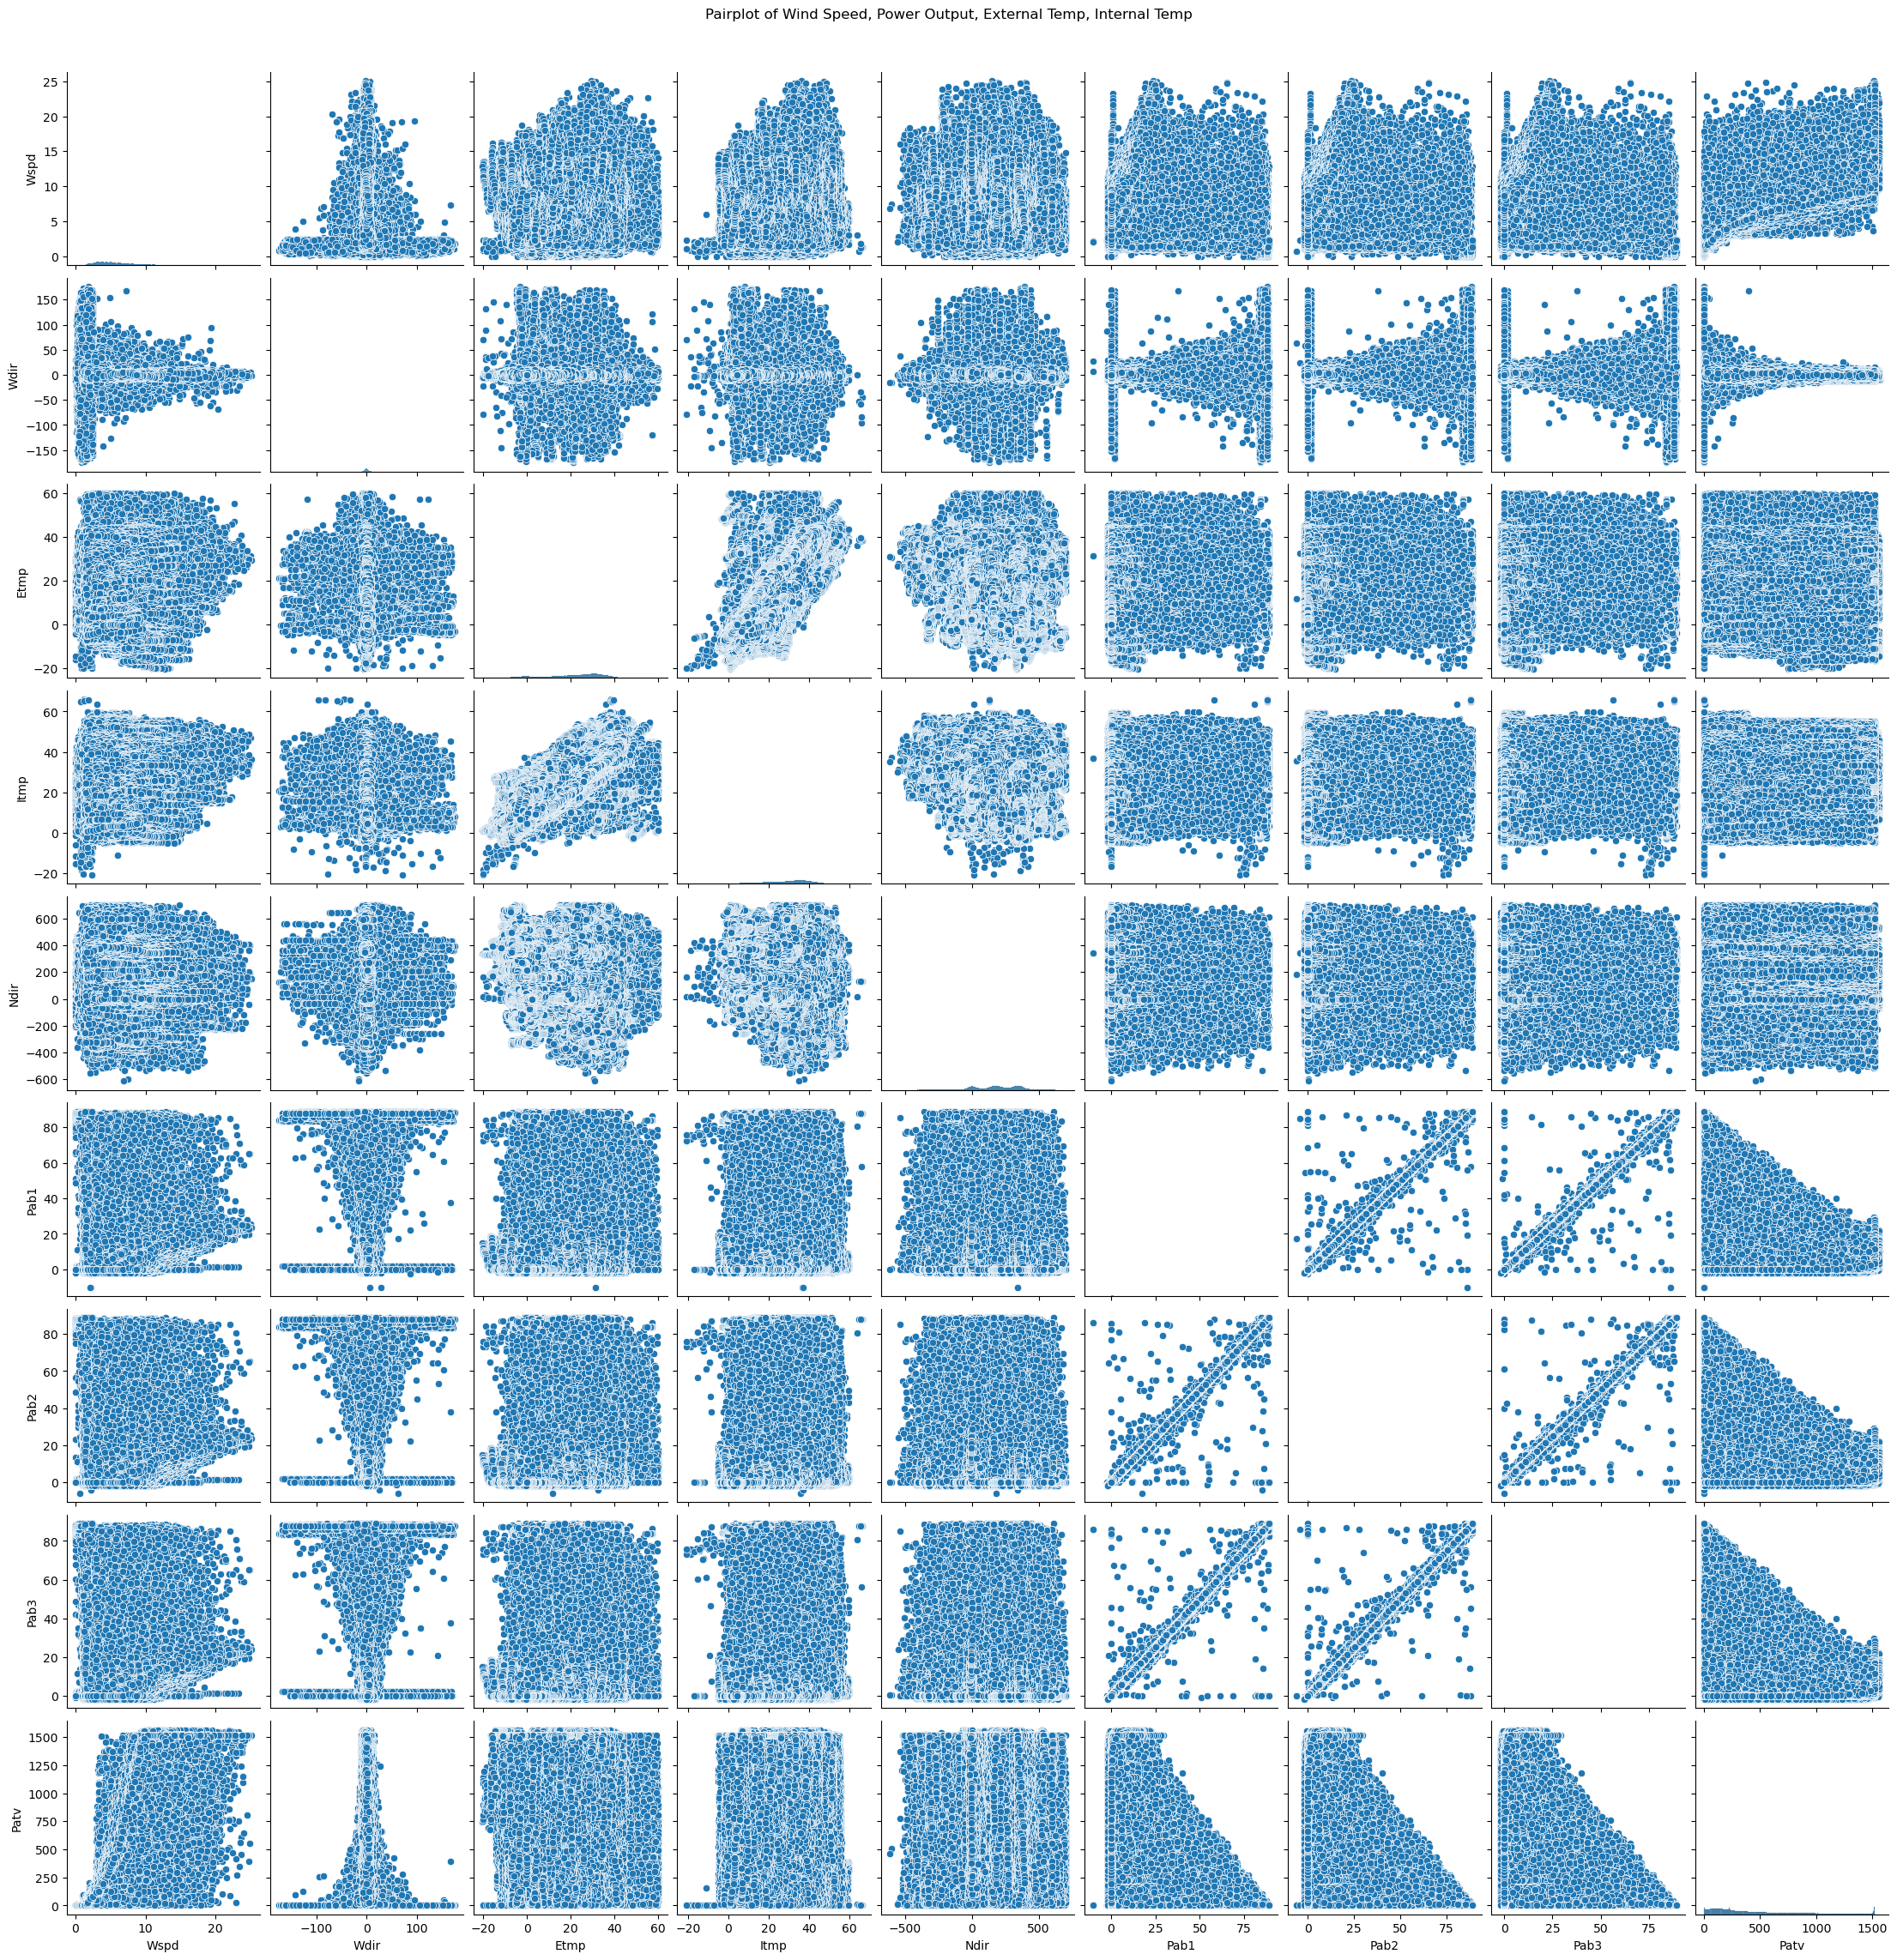

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_cleaned[['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Patv']])
plt.suptitle('Pairplot of Wind Speed, Power Output, External Temp, Internal Temp', y=1.02)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


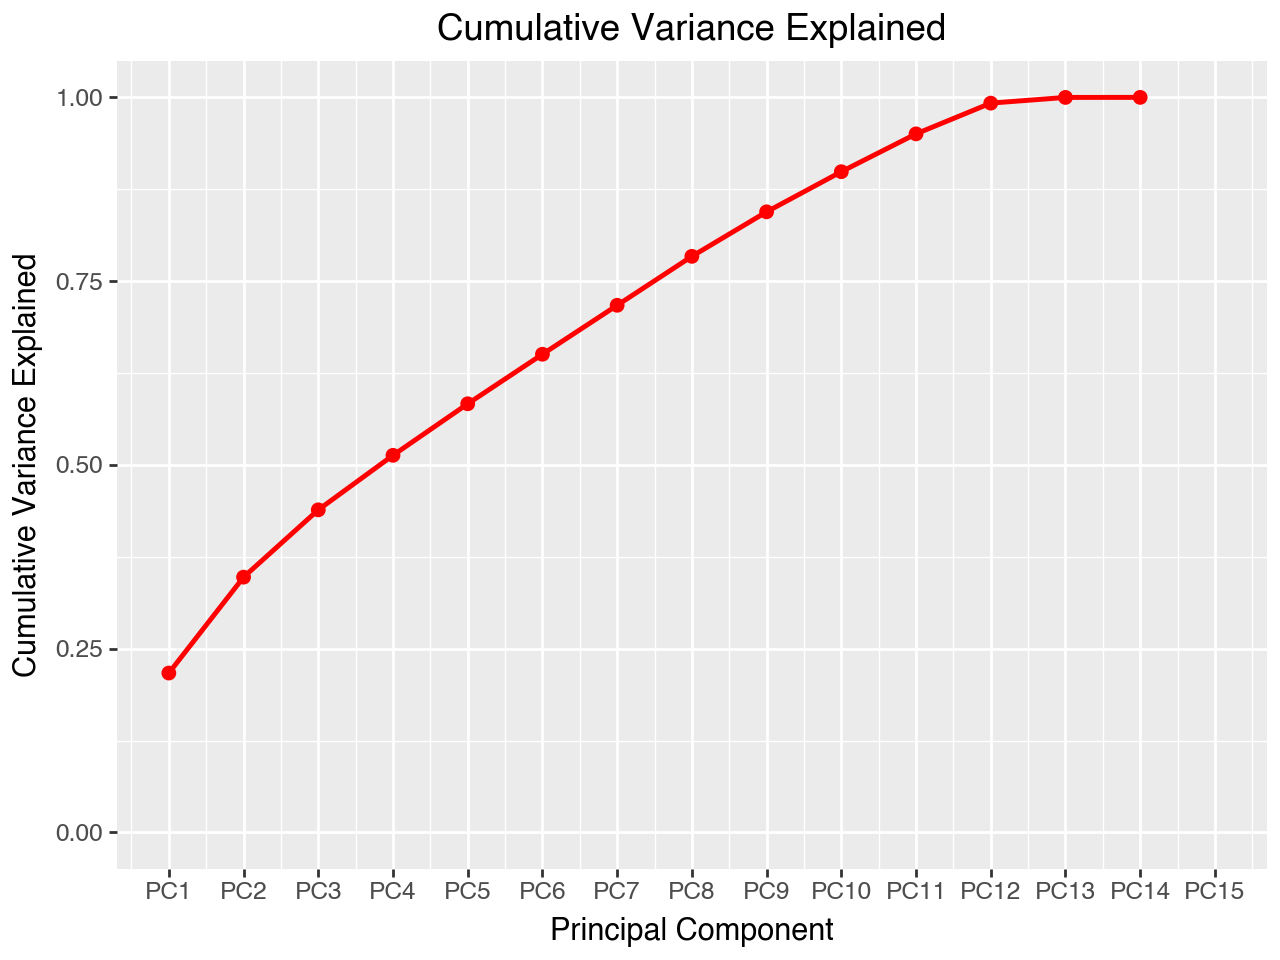

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotnine import *

features = features = [
    'Wspd',
    'Wdir_sin', 'Wdir_cos',  # Instead of 'Wdir'
    'Etmp', 'Itmp',
    'Ndir_sin', 'Ndir_cos',  # Instead of 'Ndir'
    'Pab1', 'Pab2', 'Pab3',
    'Prtv',
    'hour_sin', 'hour_cos',  # Instead of 'hour'
    'minute_sin', 'minute_cos'  # Instead of 'minute'
]

# Standardize the features
X = df_cleaned.loc[:, features].values
X_scaled = StandardScaler().fit_transform(X)

# Use all components and create scree plot
pca = PCA().fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

pc_df = pd.DataFrame({
    'PC_number': range(1, len(explained_variance) + 1),
    'Variance Explained': explained_variance,
    'Cumulative Variance': explained_variance.cumsum()  # Add cumulative sum
})

(
    ggplot(pc_df, aes(x='PC_number', y='Cumulative Variance')) +
    geom_line(color='red', size=1) +
    geom_point(color='red', size=2) +
    scale_x_continuous(breaks=range(1, len(explained_variance) + 1),
                       labels=[f'PC{i}' for i in range(1, len(explained_variance) + 1)]) +
    scale_y_continuous(limits=[0, 1]) +
    labs(title='Cumulative Variance Explained',
         x='Principal Component',
         y='Cumulative Variance Explained')
)

PC1       PC2       PC3       PC4       PC5       PC6  \
Wspd        0.112053 -0.180908 -0.580691 -0.231730 -0.179058 -0.023117   
Wdir_sin    0.001183  0.013037  0.155459  0.030387  0.250367 -0.804528   
Wdir_cos   -0.251875 -0.113914 -0.208565 -0.201580 -0.083120 -0.018358   
Etmp        0.104617 -0.654759  0.108214  0.153156  0.110951  0.011743   
Itmp        0.090765 -0.663452  0.068293  0.151128  0.103413  0.012899   
Ndir_sin    0.001438 -0.032886  0.277134 -0.578232  0.230742  0.280673   
Ndir_cos    0.004112  0.004664 -0.333183  0.222790  0.577312  0.295907   
Pab1        0.543259  0.086343  0.032253  0.012539 -0.016252  0.016720   
Pab2        0.543151  0.086217  0.031734  0.012013 -0.016436  0.016656   
Pab3        0.543214  0.086225  0.031800  0.012122 -0.016441  0.016884   
Prtv        0.125228 -0.115362 -0.526815 -0.289782 -0.140884 -0.233822   
hour_sin   -0.024925  0.220158 -0.331055  0.343328  0.417631 -0.018556   
hour_cos   -0.057145  0.005827 -0.026433  0.521302 -0.527183  0.077841   
minute_sin  0.001497  0.003059 -0.003743  0.004184  0.004981  0.276648   
minute_cos -0.002078  0.000982  0.006296 -0.019762  0.125679 -0.216259   

                 PC7       PC8       PC9      PC10      PC11      PC12  \
Wspd       -0.012000 -0.022975  0.121270 -0.063659  0.025291  0.714363   
Wdir_sin   -0.195446  0.262732  0.361438 -0.108935 -0.050214  0.111960   
Wdir_cos   -0.014922 -0.005403 -0.071946 -0.711363 -0.492341 -0.279880   
Etmp        0.001875  0.006929 -0.078165  0.048911 -0.074847 -0.024388   
Itmp        0.002156  0.005747 -0.056474  0.059239 -0.076738 -0.004966   
Ndir_sin    0.078610 -0.020231  0.458349  0.264721 -0.407131  0.056834   
Ndir_cos    0.099409 -0.004687  0.456192 -0.258910  0.330716 -0.154809   
Pab1        0.003356 -0.008456 -0.002552 -0.132947 -0.093175 -0.044488   
Pab2        0.003351 -0.008457 -0.002670 -0.135414 -0.094650 -0.045472   
Pab3        0.003403 -0.008549 -0.002699 -0.134856 -0.094311 -0.045305   
Prtv       -0.053410  0.061734  0.074810  0.407531  0.074880 -0.592374   
hour_sin   -0.002609  0.044803 -0.276226  0.323897 -0.595485  0.104007   
hour_cos    0.016203 -0.083341  0.582413  0.098702 -0.284566 -0.054489   
minute_sin -0.952655  0.124777  0.011776  0.004098  0.009903 -0.004924   
minute_cos -0.186165 -0.949396  0.026887  0.009059 -0.000103 -0.013631   

                PC13          PC14          PC15  
Wspd        0.028884  1.061708e-04  1.348975e-05  
Wdir_sin   -0.000421  1.829650e-05 -1.964302e-04  
Wdir_cos    0.000290 -2.236276e-03 -3.086384e-04  
Etmp        0.705678  2.956382e-04  2.476162e-05  
Itmp       -0.707516 -1.972338e-04  9.638546e-06  
Ndir_sin    0.002516  3.821143e-05  1.847741e-05  
Ndir_cos    0.008749 -1.421184e-04  1.153532e-05  
Pab1       -0.007891 -8.146722e-01  5.912496e-02  
Pab2       -0.008355  4.580778e-01  6.756454e-01  
Pab3       -0.008301  3.556245e-01 -7.348520e-01  
Prtv        0.011163  5.268618e-05  1.846726e-05  
hour_sin    0.005822  8.065965e-05  9.046028e-07  
hour_cos    0.012764  1.291948e-06  9.811341e-06  
minute_sin  0.000102  2.724993e-05  2.993903e-06  
minute_cos  0.000067 -4.354099e-07  1.969758e-05

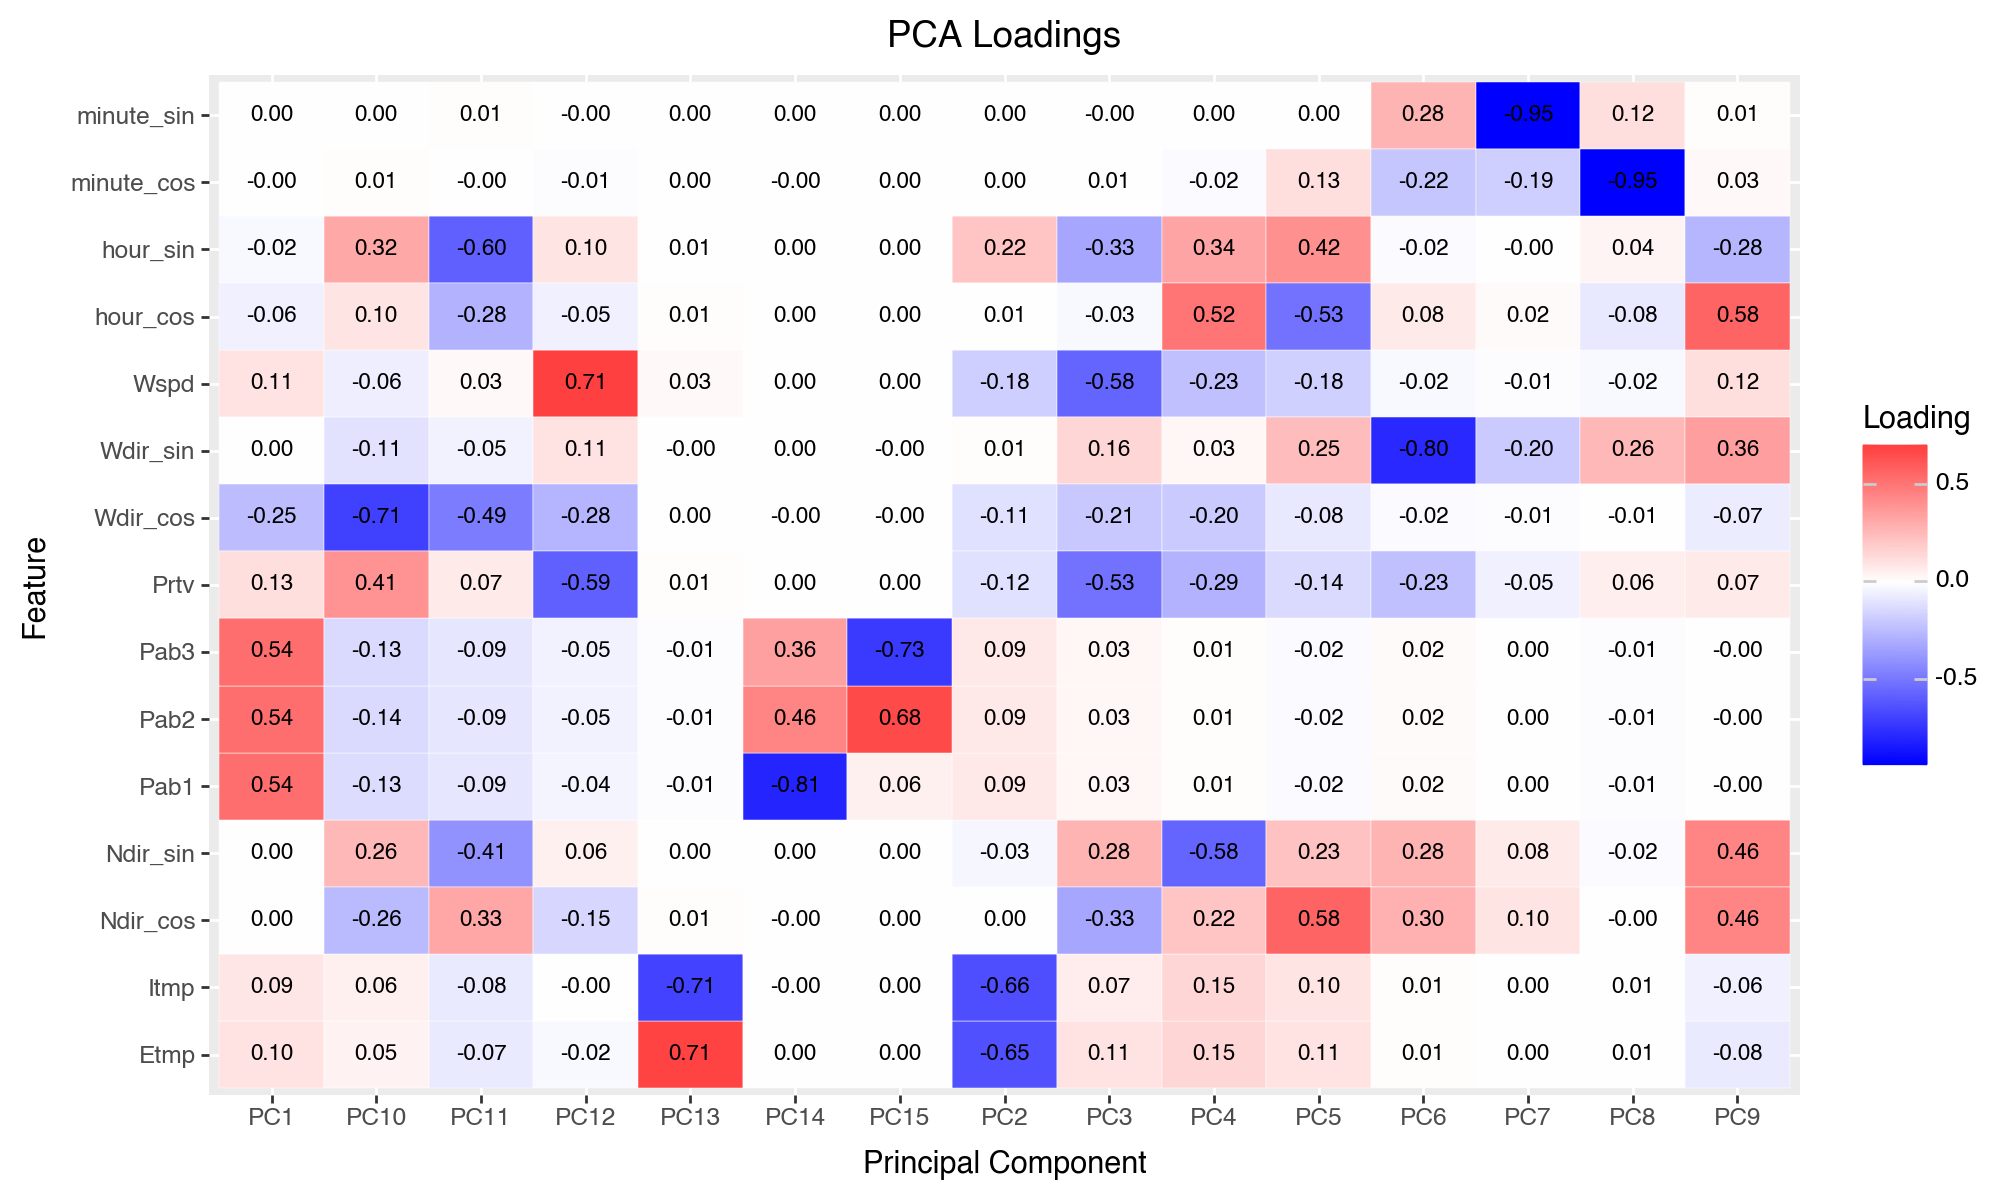

In [11]:
# Get the loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(explained_variance))],
    index=features
)

display(loadings)

loadings_long = loadings.reset_index().melt(
    id_vars='index',
    var_name='PC',
    value_name='Loading'
)
loadings_long.columns = ['Feature', 'PC', 'Loading']

(
    ggplot(loadings_long, aes(x='PC', y='Feature', fill='Loading')) +
    geom_tile(color='white') +
    geom_text(aes(label='Loading'), format_string='{:.2f}', size=8) +
    scale_fill_gradient2(low='blue', mid='white', high='red', midpoint=0) +
    labs(title='PCA Loadings', x='Principal Component', y='Feature') +
    theme(figure_size=(10, 6))
)

In [189]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Your existing data preparation code
features = [
    'Wspd',
    'Wdir_sin', 'Wdir_cos',
    'Etmp', 'Itmp',
    'Ndir_sin', 'Ndir_cos',
    'hour_sin', 'hour_cos',
    'minute_sin', 'minute_cos'
]

samples_per_turbine = 10000 // df_cleaned['TurbID'].nunique()
df_sample = df_cleaned.groupby('TurbID').head(samples_per_turbine).reset_index(drop=True)
df_sample = df_sample.sort_values(['TurbID', 'Tmstamp']).reset_index(drop=True)

split_idx = int(len(df_sample) * 0.67)
train_data = df_sample.iloc[:split_idx]
test_data = df_sample.iloc[split_idx:]

scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[features].values)
X_test = scaler.transform(test_data[features].values)
y_train = train_data['Patv'].values
y_test = test_data['Patv'].values

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestRegressor

# Define search space
search_spaces = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', 0.5, 0.7, 1.0]),
    'bootstrap': Categorical([True, False])
}

# Create BayesSearchCV object
opt = BayesSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    search_spaces,
    n_iter=30,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1
)

# Fit the optimizer
opt.fit(X_train, y_train)

# Best parameters
print("Best parameters:", opt.best_params_)
print("Best CV score:", -opt.best_score_)

# Evaluate on test set
y_pred = opt.predict(X_test)
print(f'\nTest Set Performance:')
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'R²: {r2_score(y_test, y_pred):.4f}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

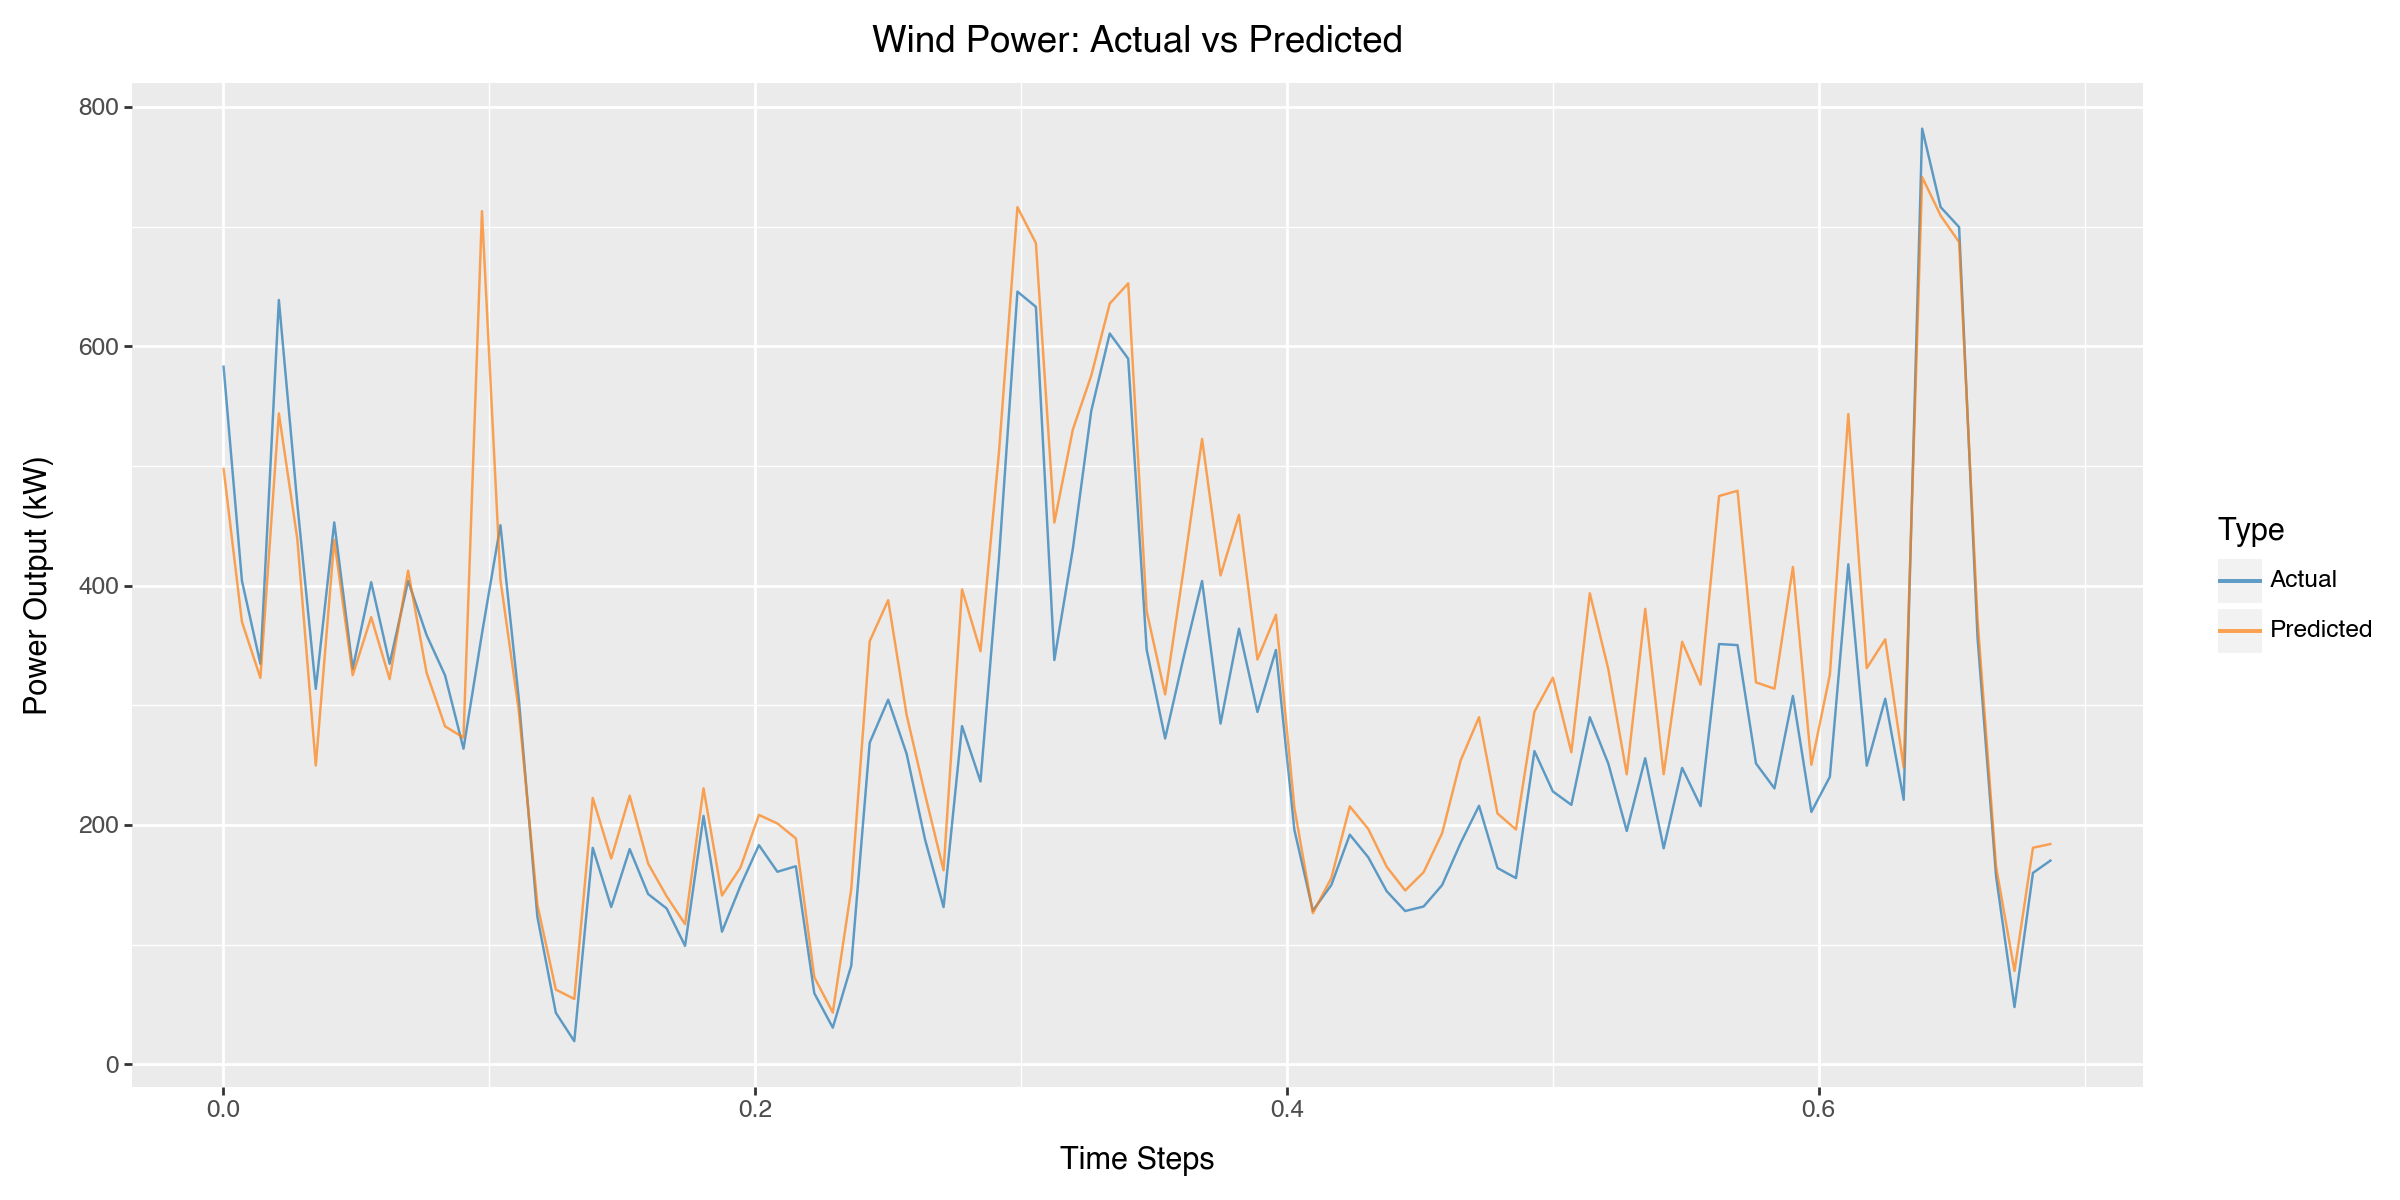

In [192]:
from plotnine import *
import pandas as pd

# Create comparison dataframe
n_points = 100  # Plot subset for readability
comparison_df = pd.DataFrame({
    'Time_Index': range(n_points),
    'Actual': y_test[:n_points],
    'Predicted': y_pred[:n_points]
})

comparison_df['day'] = comparison_df['Time_Index'] * 10 / 60 /24



plot_df = pd.melt(comparison_df,
                  id_vars=['day'],
                  value_vars=['Actual', 'Predicted'],
                  var_name='Type',
                  value_name='Power')

(
    ggplot(plot_df, aes(x='day', y='Power', color='Type')) +
    geom_line(alpha=0.7) +
    scale_color_manual(values=['#1f77b4', '#ff7f0e']) +
    labs(title='Wind Power: Actual vs Predicted',
      x='Time Steps',
      y='Power Output (kW)') +
    theme(figure_size=(12, 6))
 )

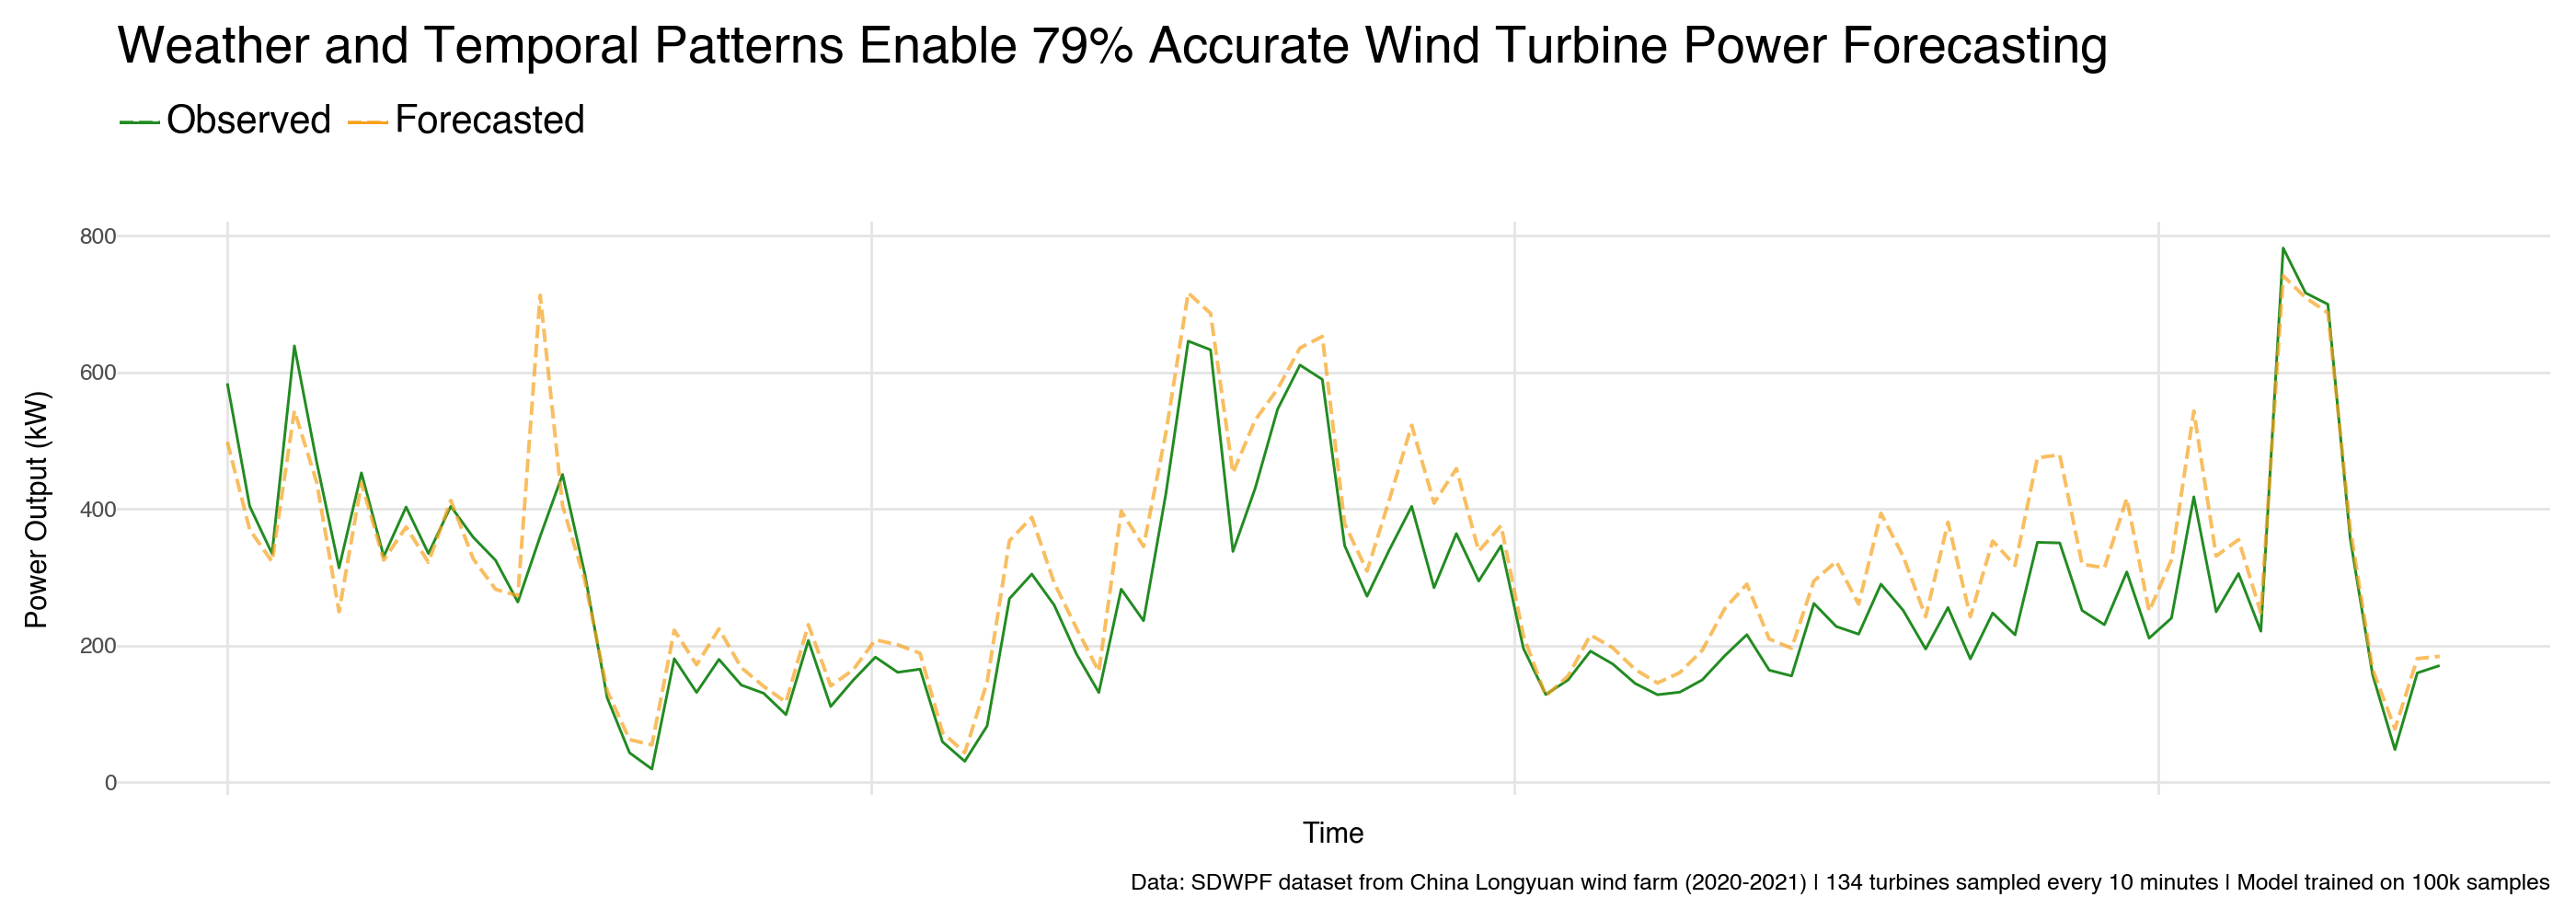

In [195]:
plot_df['Type'] = plot_df['Type'].str.replace('Actual', 'Observed')
plot_df['Type'] = plot_df['Type'].str.replace('Predicted', 'Forecasted')

# Reorder so Forecasted is drawn last (on top)
plot_df['Type'] = pd.Categorical(plot_df['Type'], categories=['Observed', 'Forecasted'], ordered=True)
plot_df = plot_df.sort_values('Type')

(
ggplot(plot_df, aes(x='day', y='Power', color='Type')) 
+ geom_line(data=plot_df[plot_df['Type']=='Observed'], size=0.6, alpha=1)
+ geom_line(data=plot_df[plot_df['Type']=='Forecasted'], size=0.8, alpha=.7, linetype='dashed')
+ scale_color_manual(values={'Observed': 'forestgreen', 'Forecasted': '#F6A21E'})
+ labs(
title = 'Weather and Temporal Patterns Enable 79% Accurate Wind Turbine Power Forecasting',
x='Time',
y='Power Output (kW)',
caption = ("Data: SDWPF dataset from China Longyuan wind farm (2020-2021) | "
"134 turbines sampled every 10 minutes | Model trained on 100k samples")
)
# + scale_x_continuous(limits=(0, 7), breaks=[0, 1, 2, 3, 4, 5, 6, 7])
+ guides(fill=guide_legend(nrow=1, reverse=True))
+ theme_minimal()
+ theme(
    figure_size=(14, 5),
    plot_title=element_text(size=20, weight='bold', margin={'b': 10}, ha='left'),
    plot_subtitle=element_text(size=12, margin={'b': 20}, ha='left'),
    # axis_text_y=element_text(size=14),
    axis_title_x=element_text(size=11, margin={'t': 10}),
    axis_text_x=element_blank(),
    # axis_text_y=element_blank(),
    legend_position='top',
    legend_direction='horizontal',
    legend_box='horizontal',
    legend_title=element_blank(),
    legend_text=element_text(size=15),
    legend_justification='left',
    legend_box_just='left',
    panel_grid_minor=element_blank()
        )
)

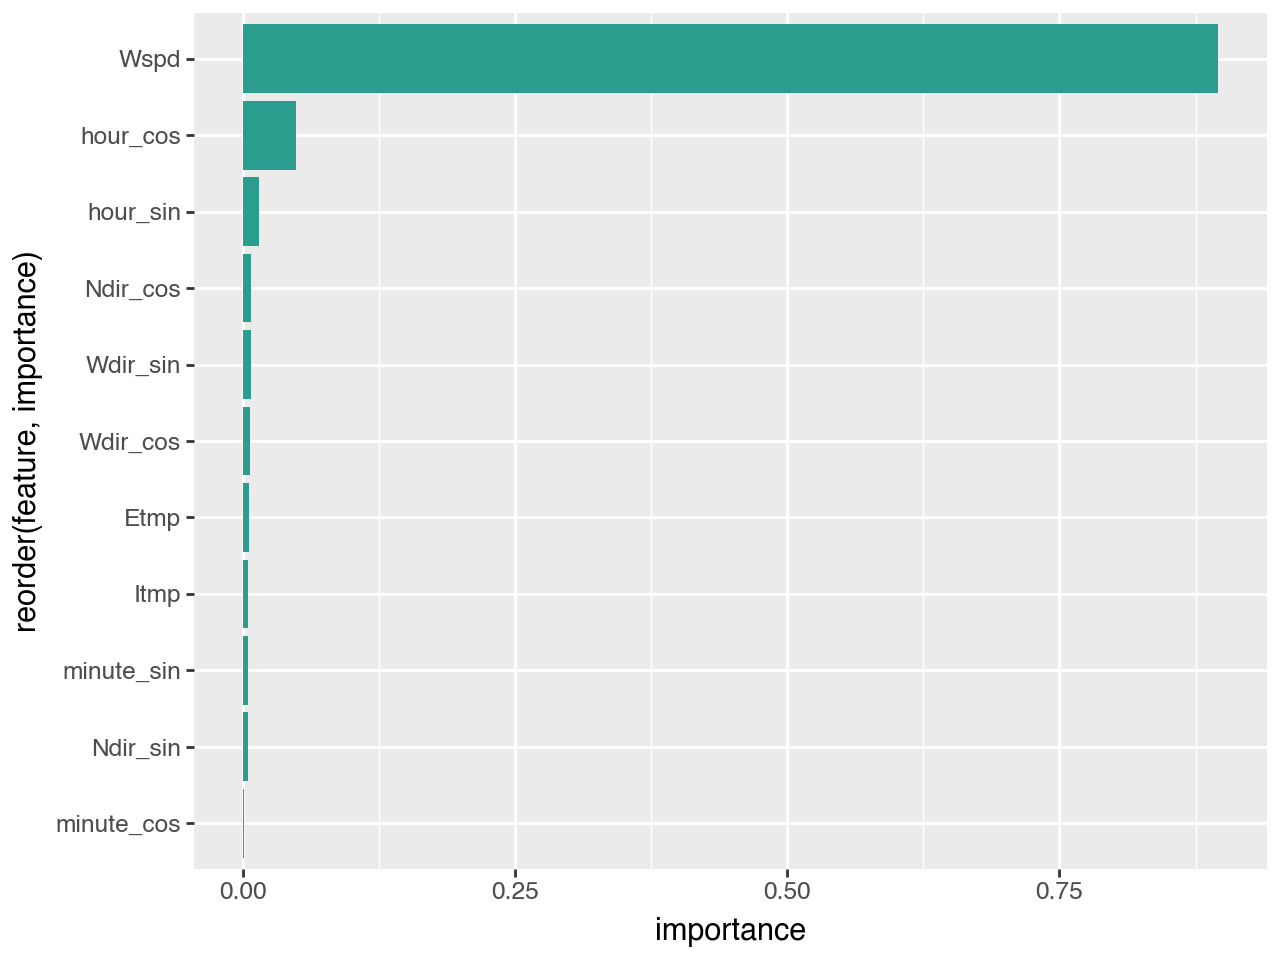

In [75]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': opt.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

(
    ggplot(feature_importance, aes(x='reorder(feature, importance)', y='importance')) +
    geom_bar(stat='identity', fill='#2a9d8f') 
    + coord_flip() 
    

)

In [83]:
df_sample.head()

TurbID  Day Tmstamp  Wspd  Wdir   Etmp   Itmp   Ndir  Pab1  Pab2  ...  \
0       1    2   00:10  7.00  0.84  27.87  42.05  -2.77  1.00  1.00  ...   
1       1    2   00:20  5.87 -2.61  27.38  41.73  -9.17  0.99  0.99  ...   
2       1    2   00:30  4.00  3.26  27.13  41.76  -8.20  0.99  0.99  ...   
3       1    2   00:40  4.03  2.88  26.99  41.66   2.82  0.99  0.99  ...   
4       1    2   00:50  3.46  1.32  26.80  41.36  38.08  0.99  0.99  ...   

   hour_cos    minute_sin  minute_cos  Wdir_sin  Wdir_cos  Ndir_sin  Ndir_cos  \
0       1.0  8.660254e-01         0.5  0.014660  0.999893 -0.048327  0.998832   
1       1.0  8.660254e-01        -0.5 -0.045537  0.998963 -0.159364  0.987220   
2       1.0  5.665539e-16        -1.0  0.056867  0.998382 -0.142629  0.989776   
3       1.0 -8.660254e-01        -0.5  0.050244  0.998737  0.049198  0.998789   
4       1.0 -8.660254e-01         0.5  0.023036  0.999735  0.616761  0.787150   

   Patv_lag1  Patv_lag6  Patv_lag144  
0    1468.21    1330.24       494.66  
1     718.12    1550.74       509.76  
2     442.15    1549.66       542.53  
3     196.04    1549.64       509.36  
4     234.35    1361.95       482.21  

[5 rows x 26 columns]

In [87]:
!pip install scikit-misc


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


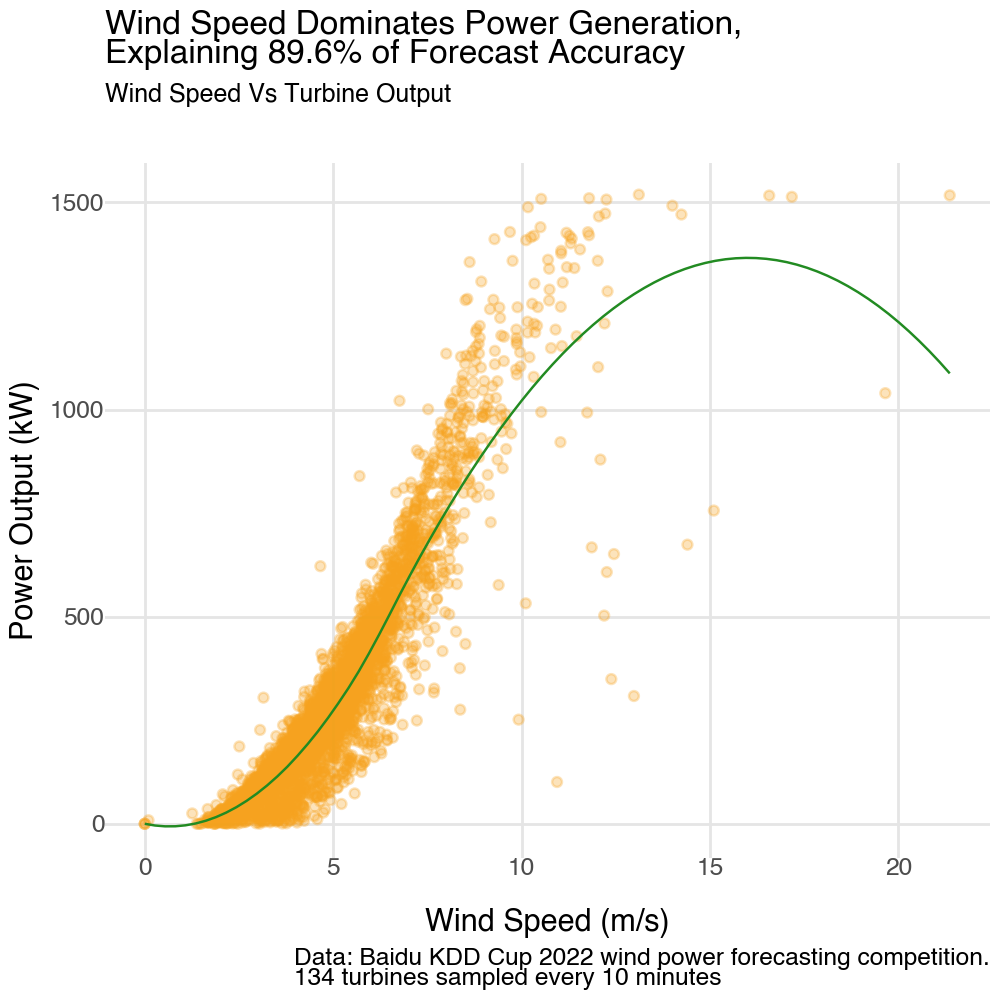

In [187]:
plot_df = df_sample[['Wspd', 'Patv']].copy()
plot_df.rename(columns={'Wspd': 'Wind Speed (m/s)', 'Patv': 'Power Output (kW)'}, inplace=True)

# plot wind speed vs power output
(
    ggplot(plot_df.sample(5000, random_state=42), aes(x='Wind Speed (m/s)', y='Power Output (kW)')) +
    geom_point(alpha=0.3, color='#F6A21E') 
    + geom_smooth(method='loess', color='forestgreen', se=False, size=.5)
    + labs(
        title='Wind Speed Dominates Power Generation, \nExplaining 89.6% of Forecast Accuracy',
        subtitle='Wind Speed Vs Turbine Output',
        caption=("Data: Baidu KDD Cup 2022 wind power forecasting competition.\n"
                 "134 turbines sampled every 10 minutes")
    )
    # + scale_y_continuous(limits=(0, 1800),
    #                     breaks=range(0, 1800, 1000)
    #                      )
    # + scale_x_continuous(limits=(0, 30),
    #                     breaks=range(0, 30, 10)
    #                      )
    + theme_minimal()
    + theme(
        figure_size=(5, 5),
        plot_title=element_text(size=12, weight='bold', margin={'b': 5}, ha='left'),
        plot_subtitle=element_text(size=9, margin={'b': 20}, ha='left'),
        # axis_text_y=element_text(size=14),
        axis_title_x=element_text(size=11, margin={'t': 10}),
        # axis_text_x=element_blank(),
        # axis_text_y=element_blank(),
        legend_position='top',
        legend_direction='horizontal',
        legend_box='horizontal',
        legend_title=element_blank(),
        legend_text=element_text(size=15),
        legend_justification='left',
        legend_box_just='left',
        panel_grid_minor=element_blank()
        )
)

In [ ]:
(
    ggplot(df_sample.head(5000), aes(x='Wspd', y='Patv')) +
    geom_point(alpha=0.3, color='#264653') 
    
)

In [138]:
import pandas as pd

# Reading Parquet
hydro_df = pd.read_parquet('data/AT_EFAS-3.5_vs_ENTSOE-INFLOW_2015-2019.parquet')
print(hydro_df.shape)
hydro_df.head()

(261, 189)


year  week  entsoe_inflow  time_id       H1007        H1032        H1047  \
0  2015.0   1.0      552130.10  2015_01  1178.85107   939.106440   898.650875   
1  2015.0   2.0      619747.00  2015_02  2034.12109  1303.292960  1340.323740   
2  2015.0   3.0      577508.20  2015_03  1158.26709   689.144529   866.427250   
3  2015.0   4.0      407744.70  2015_04   788.51465   503.528320   676.515626   
4  2015.0   5.0      392691.29  2015_05   582.91895   397.842775   574.859375   

        H1056        H1076      H1088  ...        H822        H841  \
0  340.611328  1156.103526  49.326172  ...  11396.2290  1421.97217   
1  519.107418  1996.711930  74.033691  ...  17445.0732  1312.05761   
2  370.910644  1151.978030  46.605957  ...  10647.7018  1324.98486   
3  295.840820   783.149406  43.155273  ...   8239.1513  1229.98144   
4  269.932615   579.122069  41.236328  ...   6538.7910  1083.59472   

          H864         H912         H927         H93        H956         H971  \
0   955.126960   898.650875  1186.059066  229.615234  468.930176   870.347160   
1  1161.214360  1340.323740  2068.341310  245.203122  480.729990  1547.342270   
2   994.432130   866.427250  1163.974610  225.454589  452.821774   913.940920   
3   862.110340   676.515626   793.386720  213.982420  408.432621   618.167969   
4   805.798834   574.859375   585.428704  206.708985  383.072267   459.677728   

          H990  area  
0   870.347160    AT  
1  1547.342270    AT  
2   913.940920    AT  
3   618.167969    AT  
4   459.677728    AT  

[5 rows x 189 columns]

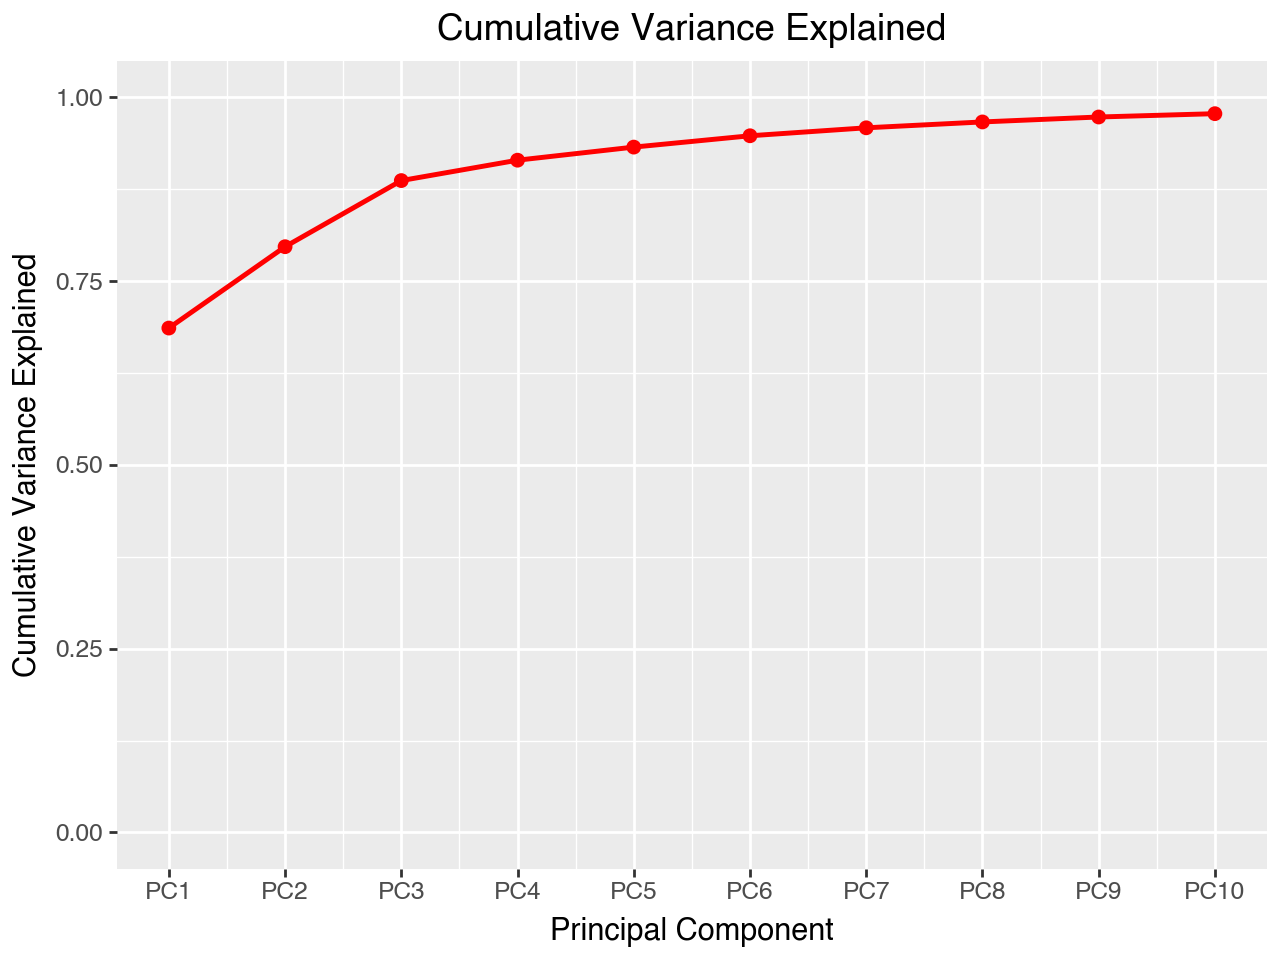

In [139]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotnine import *

features = [col for col in hydro_df.columns if col.startswith('H')]

# Standardize the features
X = hydro_df.loc[:, features].values
X_scaled = StandardScaler().fit_transform(X)

# Use all components and create scree plot
pca = PCA(n_components=10).fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

pc_variance_df = pd.DataFrame({
    'PC_number': range(1, len(explained_variance) + 1),
    'Variance Explained': explained_variance,
    'Cumulative Variance': explained_variance.cumsum()  # Add cumulative sum
})

(
    ggplot(pc_variance_df, aes(x='PC_number', y='Cumulative Variance')) +
    geom_line(color='red', size=1) +
    geom_point(color='red', size=2) +
    scale_x_continuous(breaks=range(1, len(explained_variance) + 1),
                       labels=[f'PC{i}' for i in range(1, len(explained_variance) + 1)]) +
    scale_y_continuous(limits=[0, 1]) +
    labs(title='Cumulative Variance Explained',
         x='Principal Component',
         y='Cumulative Variance Explained')
)

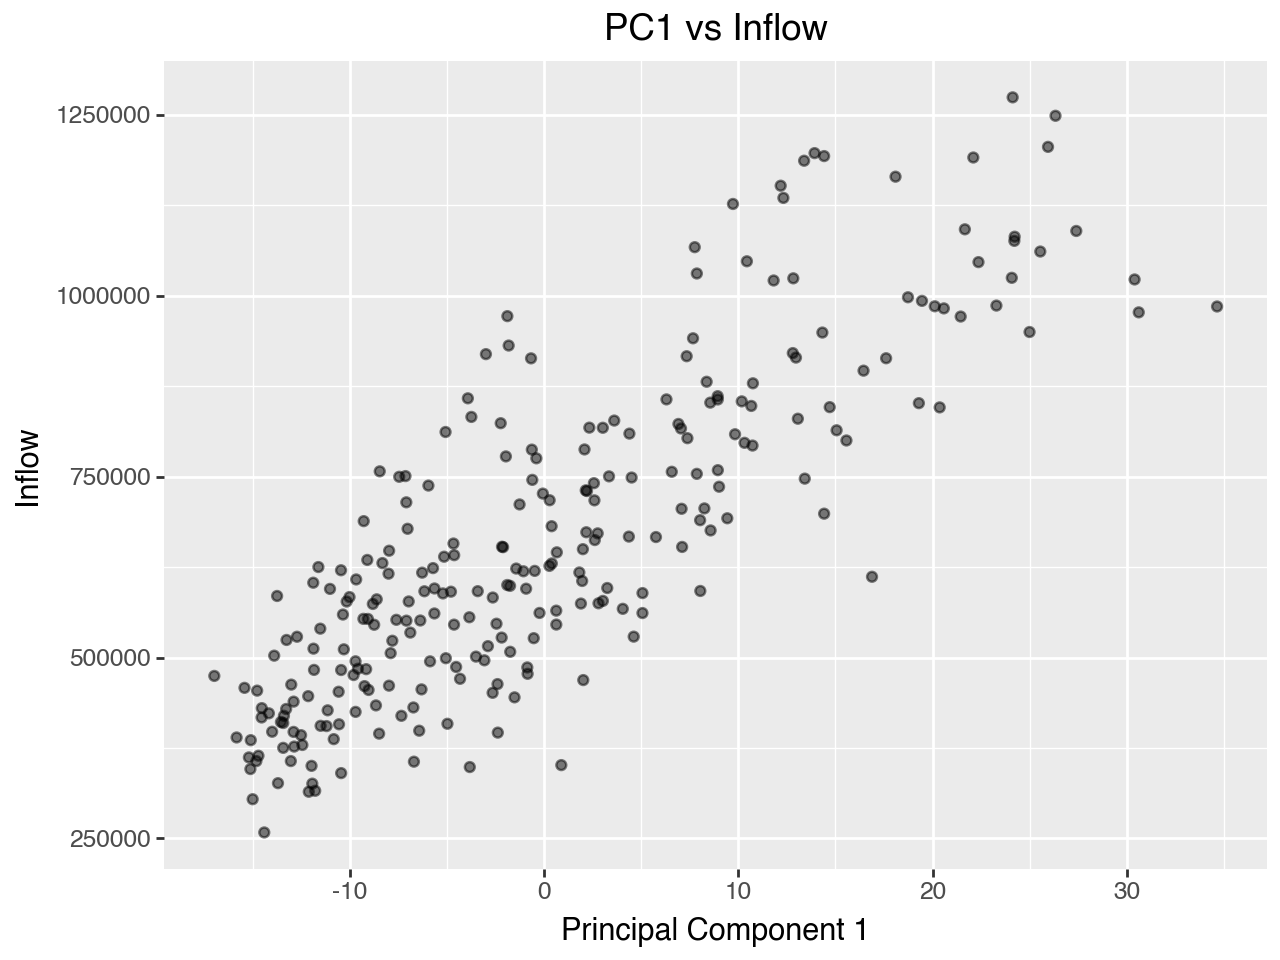

In [140]:
pca = PCA(n_components=100)  # choose number of components here
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame
pc_componensts_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pc_componensts_df['y'] = hydro_df['entsoe_inflow']


(
    ggplot(pc_componensts_df, aes(x='PC1', y='y')) +
    geom_point(alpha=0.5) +
    labs(title='PC1 vs Inflow',
         x='Principal Component 1',
         y='Inflow')
)


In [142]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

features = [col for col in hydro_df.columns if col.startswith('H')]

split_idx = int(len(hydro_df) * 0.67)
train_data = hydro_df.iloc[:split_idx]
test_data = hydro_df.iloc[split_idx:]

scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[features].values)
X_test = scaler.transform(test_data[features].values)
y_train = train_data['entsoe_inflow'].values
y_test = test_data['entsoe_inflow'].values

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestRegressor

# Define search space
search_spaces = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', 0.5, 0.7, 1.0]),
    'bootstrap': Categorical([True, False])
}

# Create BayesSearchCV object
opt = BayesSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    search_spaces,
    n_iter=30,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1
)

# Fit the optimizer
opt.fit(X_train, y_train)

# Best parameters
print("Best parameters:", opt.best_params_)
print("Best CV score:", -opt.best_score_)

# Evaluate on test set
y_pred = opt.predict(X_test)
print(f'\nTest Set Performance:')
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'R²: {r2_score(y_test, y_pred):.4f}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/opt/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 5, 'sqrt', 10, 20, 500] before, using random point [False, 30, 1.0, 8, 12, 177]


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: OrderedDict([('bootstrap', True), ('max_depth', 16), ('max_features', 'sqrt'), ('min_samples_leaf', 10), ('min_samples_split', 19), ('n_estimators', 500)])
Best CV score: 137043.4946818128

Test Set Performance:
MSE: 9839067668.8878
MAE: 76942.7526
R²: 0.7901


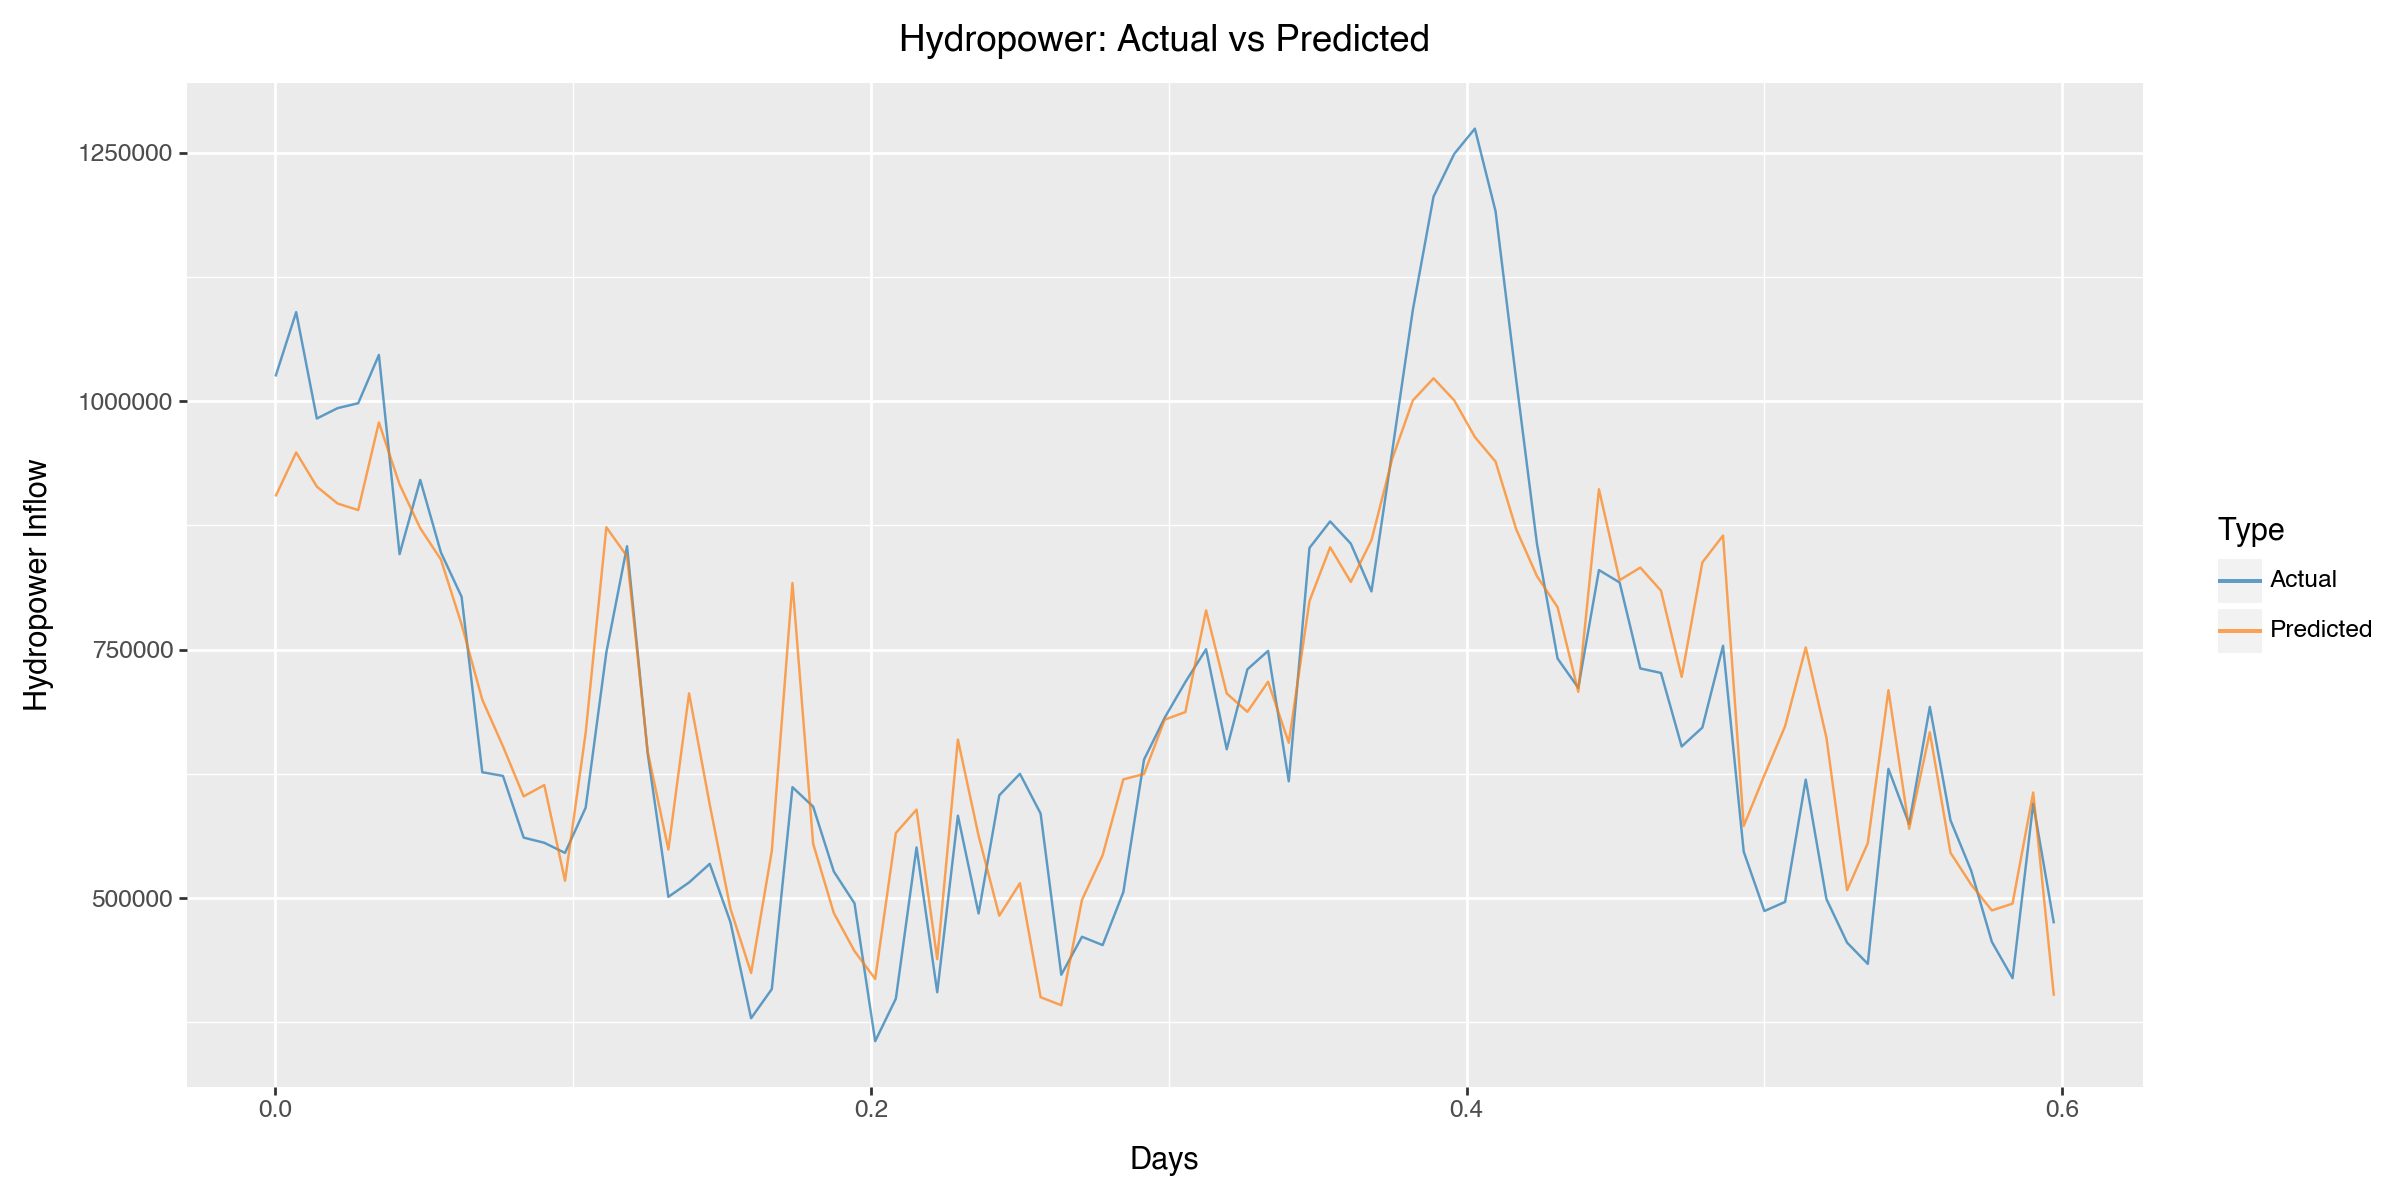

In [152]:
from plotnine import *
import pandas as pd

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Time_Index': range(len(y_test)),  # ← Add parentheses and length
    'Actual': y_test,
    'Predicted': y_pred
})

comparison_df['day'] = comparison_df['Time_Index'] * 10 / 60 / 24

plot_df = pd.melt(comparison_df,
                  id_vars=['day'],
                  value_vars=['Actual', 'Predicted'],
                  var_name='Type',
                  value_name='Power')

(
    ggplot(plot_df, aes(x='day', y='Power', color='Type')) +
    geom_line(alpha=0.7) +
    scale_color_manual(values=['#1f77b4', '#ff7f0e']) +
    labs(title='Hydropower: Actual vs Predicted',  # ← Updated title
         x='Days',  # ← Updated label
         y='Hydropower Inflow') +  # ← Updated label
    theme(figure_size=(12, 6))
)

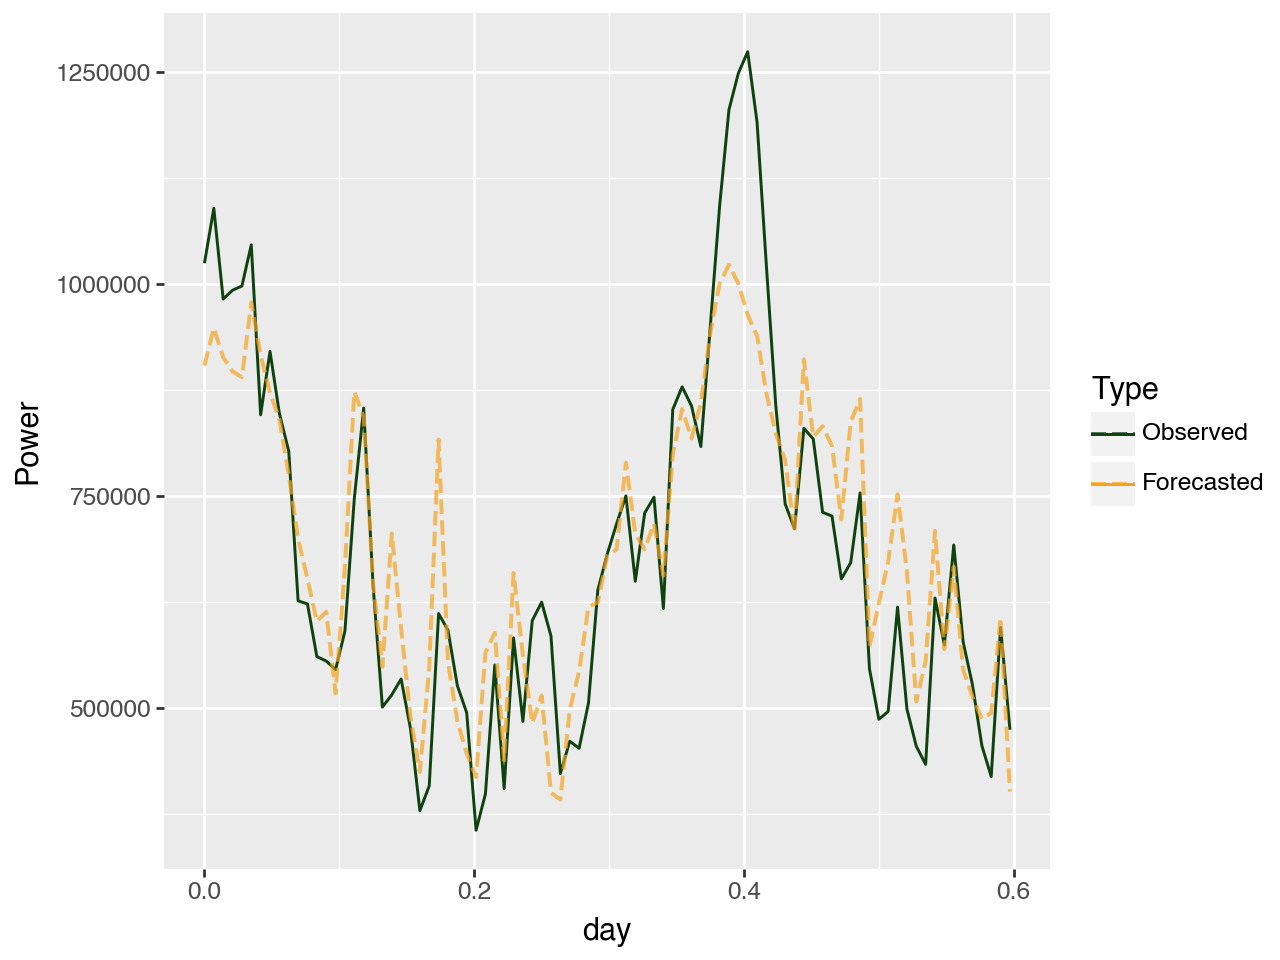

In [160]:
plot_df['Type'] = plot_df['Type'].str.replace('Actual', 'Observed')
plot_df['Type'] = plot_df['Type'].str.replace('Predicted', 'Forecasted')

# Reorder so Forecasted is drawn last (on top)
plot_df['Type'] = pd.Categorical(plot_df['Type'], categories=['Observed', 'Forecasted'], ordered=True)
plot_df = plot_df.sort_values('Type')

(
    ggplot(plot_df, aes(x='day', y='Power', color='Type')) 
    + geom_line(data=plot_df[plot_df['Type']=='Observed'], size=0.6, alpha=1)
    + geom_line(data=plot_df[plot_df['Type']=='Forecasted'], size=0.8, alpha=.7, linetype='dashed')
    + scale_color_manual(values={'Observed': '#104210', 'Forecasted': '#F6A21E'})
    # + scale_y_continuous(limits=(0, 850),
    #                      breaks=[0, 300, 600])
)

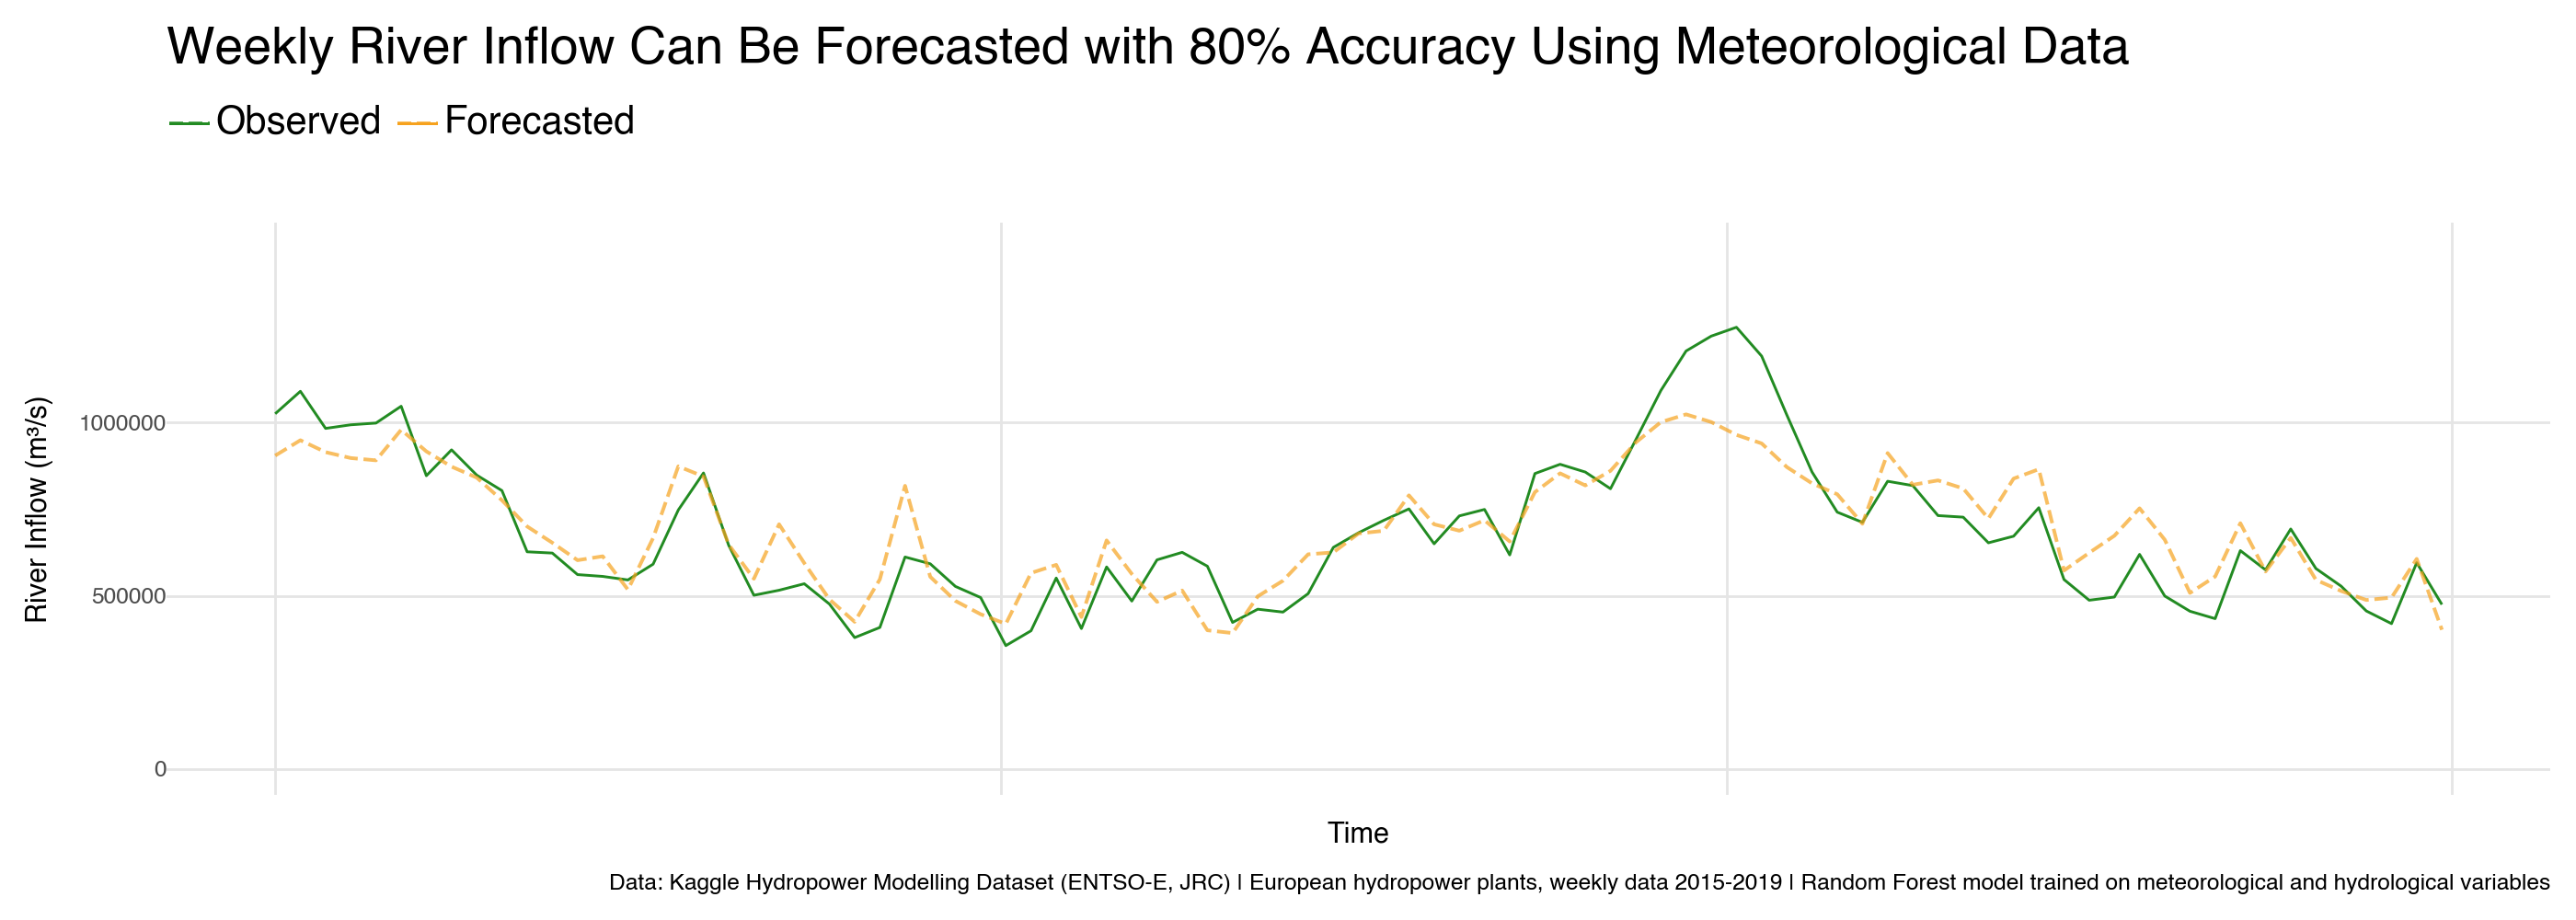

In [170]:


(
    ggplot(plot_df, aes(x='day', y='Power', color='Type')) 
    + geom_line(data=plot_df[plot_df['Type']=='Observed'], size=0.6, alpha=1)
    + geom_line(data=plot_df[plot_df['Type']=='Forecasted'], size=0.8, alpha=.7, linetype='dashed')
    + scale_color_manual(values={'Observed': 'forestgreen', 'Forecasted': '#F6A21E'})
    + scale_y_continuous(limits=(0, 1500000),
                         breaks=range(0, 1500000, 500000))
    + labs(
    title = 'Weekly River Inflow Can Be Forecasted with 80% Accuracy Using Meteorological Data',
    x = 'Time',
    y = 'River Inflow (m³/s)',
    caption = ("Data: Kaggle Hydropower Modelling Dataset (ENTSO-E, JRC) | "
        "European hydropower plants, weekly data 2015-2019 | "
        "Random Forest model trained on meteorological and hydrological variables")) 
    # + scale_x_continuous(limits=(0, 7), breaks=[0, 1, 2, 3, 4, 5, 6, 7])
    + guides(fill=guide_legend(nrow=1, reverse=True))
    + theme_minimal()
    + theme(
    figure_size=(14, 5),
    plot_title=element_text(size=20, weight='bold', margin={'b': 10}, ha='left'),
    plot_subtitle=element_text(size=12, margin={'b': 20}, ha='left'),
    # axis_text_y=element_text(size=14),
    axis_title_x=element_text(size=11, margin={'t': 10}),
    axis_text_x=element_blank(),
    # axis_text_y=element_blank(),
    legend_position='top',
    legend_direction='horizontal',
    legend_box='horizontal',
    legend_title=element_blank(),
    legend_text=element_text(size=15),
    legend_justification='left',
    legend_box_just='left',
    panel_grid_minor=element_blank()
        )
)